<div>
    <p style="float: left;"><img src="images/python_logo.png" height="200px" width="200px" border="1px"></p>
    <center>
    <h1> The Supreme Py </h1>
    <br>
    by Juan Barbosa
    </center>
</div>
<hr style="height:5px">

# Brief introduction 
Ever since the creation of computers, its use has increased exponentially.
<IMG SRC="images/computer_use.png" WIDTH=600/>
U.S. Census Bureau. (2013, May 12). *Computer and Internet Use in the 
United States*. Retrieved October 4, 2016, from http://www.census.gov/prod/2013pubs/p20-569.pdf

<hr style="height:2px">

We use computers for all sorts of things:
### To connect
<img src="https://images-na.ssl-images-amazon.com/images/G/01//digital/video/merch/online.jpg" width=400/>
### To entertain
<img src="http://www.gadgetfolder.com/wp-content/uploads/2010/01/logitech_speaker_lapdesk_n700_2.jpg" width=400/>
### To write
<img src="https://www.uwlax.edu/uploadedImages/Academics/Departments/Psychology/WritingComputer.jpg" width=400/>
### To complete schoolwork
<img src="https://www.cos.edu/TrainingCenter/ComputerSoftwareSkills/PublishingImages/Computer.jpg" width=400/>
### On research
<img src="http://jonathankinlay.com/wp-content/uploads/periodic-table-of-programming-languages-1-728.jpg" width=500/>
- data, *data* and **more data**

<hr style="height:5px">

# The dark side

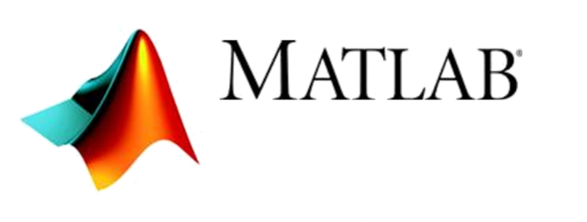

In [1]:
from IPython.display import display, HTML, Image
import urllib.request

display(Image("images/MATLAB_logo.png"))

In [2]:
def clean_up(page, clean):
    for item in clean:
        page = page.replace(item, '')
    return page

## Pricing

- Student licenses for MATLAB can [cost][1] up to \$625 

- Python is free

   [1]: https://www.mathworks.com/pricing-licensing/?intendeduse=edu#acaindividual "MATLAB prices"

In [3]:
url_matlab = 'https://www.mathworks.com/pricing-licensing/?intendeduse=edu#acaindividual'

response = urllib.request.urlopen(url_matlab)
html = response.read()
html = str(html)
html = clean_up(html, [r'\n', r'\t', r'\r', "b'"])
display(HTML(html))

<hr style="height:5px">

# A few advantages
# Notebook
*"Jupyter notebooks are great because they allow you to easily present interactive figures. In addition, these notebooks include the figures and code in a single file, making it easy for others to reproduce your results."* [The File Drawer][1]

   [1]: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/ "The File Drawer"

## Fourier example

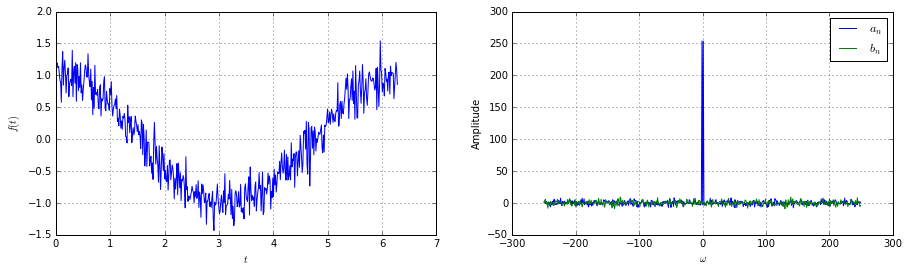

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def filtering(coeff, number = 1):
    temp = coeff.copy()
    results = np.zeros_like(temp)
    for i in range(2*number):
        pos = temp.argmax()
        results[pos] += temp[pos]
        temp[pos] = 0

    return results

# function
N = 500 # number of points
T = 2*np.pi # period
t = np.linspace(0, T, N)
f_t = np.cos(t)
f_t += np.random.normal(0, 0.2, N) # adds noise

# Fourier analysis
coeff = np.fft.fft(f_t)
freq = np.fft.fftfreq(N)*2*np.pi*N/T
pos = freq.argsort() # change position
freq = freq[pos]

a_n = np.real(coeff)[pos]
b_n = np.imag(coeff)[pos]

# plotting
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(15,4) # sets size of the figure

ax1.plot(t, f_t)
ax1.grid(True) # plots grid
ax1.set_xlabel("$t$")
ax1.set_ylabel("$f(t)$")

ax2.plot(freq, a_n, label="$a_n$")
ax2.plot(freq, b_n, label="$b_n$")
ax2.grid(True)
ax2.set_xlabel("$\omega$")
ax2.set_ylabel("Amplitude")
ax2.legend()

#ax2.set_xlim(-2,2)
plt.show()

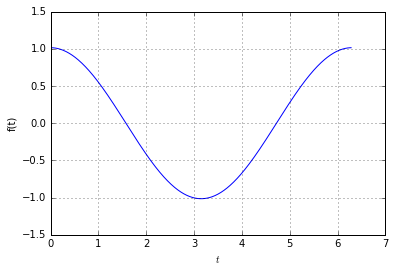

In [5]:
filtered = np.real(np.fft.ifft(filtering(coeff, 1)))

plt.plot(t, filtered)
plt.xlabel("$t$")
plt.ylabel("f(t)")
plt.grid()
plt.show()

### An animation

In [6]:
# change backend
#import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

# backgroud plots
ax1.plot(t, f_t, "--", c = "black", alpha = 0.3)
ax2.plot(t, filtered, "--", c = "black", alpha = 0.3)

# dynamic elements
line, = ax1.plot([], [], "-")
point, = ax1.plot([], [], "o")
line_f1, = ax2.plot([], [], "-")
point_f1, = ax2.plot([], [], "o")

# style
ax1.set_ylim(min(f_t)*1.5, max(f_t)*1.5)
ax1.set_xlim(min(t), max(t))
ax1.grid()
ax1.set_ylabel("$f(t)$")
ax1.set_xlabel("$t$")

ax2.set_xlim(min(t), max(t))
ax2.grid()
ax2.set_xlabel("$t$")

fig.tight_layout()

def run(pos):
    line.set_data(t[:pos], f_t[:pos])
    point.set_data(t[pos-1], f_t[pos-1])
    line_f1.set_data(t[:pos], filtered[:pos])
    point_f1.set_data(t[pos], filtered[pos])
#    return line, point, line_f1, point_f1,

ani = animation.FuncAnimation(fig, run, np.arange(0, N), interval = 1/N, repeat=True)
plt.show()

Using matplotlib backend: Qt4Agg


# Photograph examples

<img src="images/milkyway.jpg" width=600/>

<p style="text-align:right"> <strong>San Agustín, Colombia.</strong> April 2014. 99 Stacked photographs.</p>